In [1]:
using Random, PyPlot, LinearAlgebra, Statistics, Distributions


In [2]:
using HSVGP

┌ Info: Precompiling HSVGP [d11b312e-8311-4295-b779-e3d9d197688a]
└ @ Base loading.jl:1278


In [3]:
rng = MersenneTwister(123);
N   = 50000
X   = 2 .* rand(rng, N)
X   = reshape(X,(N,1)); # Ensure X has two dimensions as required

lam = 6. * exp.(-2.0 .* X[:,1]) .* sin.(6*X[:,1]) .+ 10.;
Y   = [rand(Poisson(l),1)[1] for l in lam];

In [4]:
temp_model = HSVGP.SVGP_obj(X, float(Y), 6, "poisson");
test_inf   = HSVGP.Inference_obj(X, float(Y), 6, "poisson");

In [5]:
# Package currently defaults to initialize based on nearest neighbor data
#     for poisson we want GP on log-lambda, so should initialize
#     the inducing points taking log of data (and adjusting for zeros)

temp_model.params.inducing_mean = log.(temp_model.params.inducing_mean .+ 1.0);
temp_model.params.const_mean    = log.(temp_model.params.const_mean);


In [6]:
@time opt_trace, p_traces = HSVGP.fit_svgp!(temp_model, n_iters=20000, batch_size=10, return_param_traces = true);

 85.591330 seconds (165.05 M allocations: 22.832 GiB, 6.91% gc time)


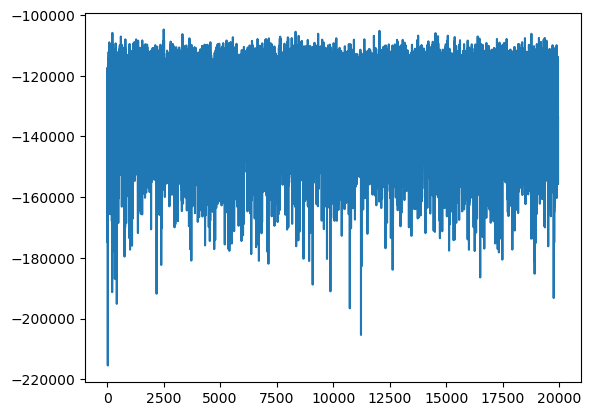

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fca3f324ca0>

In [7]:
PyPlot.plot(opt_trace[50:end])


In [8]:
@time opt_trace_inf = HSVGP.fit_inference!(test_inf, n_iters=20000, batch_size=10);

 42.425977 seconds (132.40 M allocations: 21.472 GiB, 9.15% gc time)


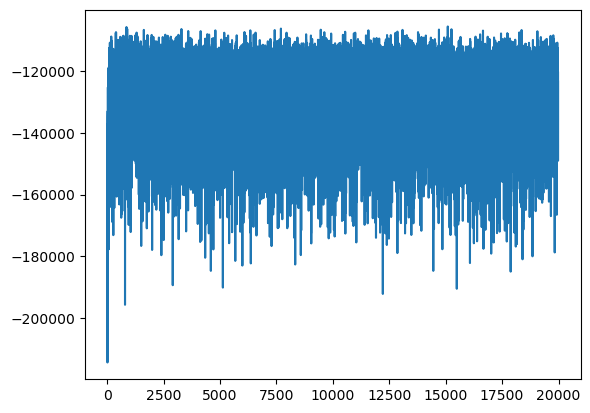

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fca40a85520>

In [9]:
PyPlot.plot( opt_trace_inf[20:end] )


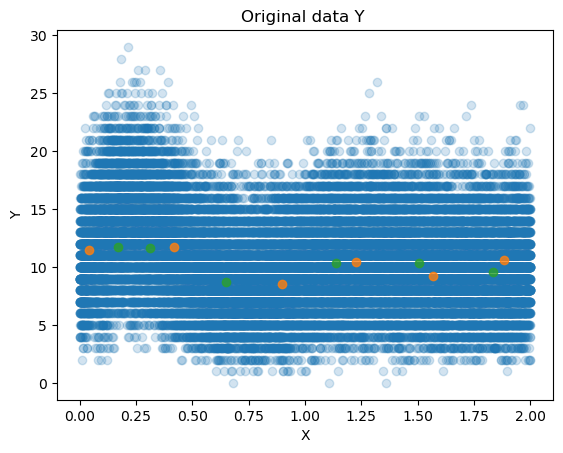

PyObject Text(0.5, 1.0, 'Original data Y ')

In [10]:
PyPlot.scatter(X, Y, alpha=0.2)
PyPlot.scatter(temp_model.params.inducing_locs, exp.(temp_model.params.inducing_mean), alpha=0.8)
PyPlot.scatter(test_inf.params[1].inducing_locs, exp.(test_inf.params[1].inducing_mean), alpha=0.8)
PyPlot.xlabel("X")
PyPlot.ylabel("Y")
PyPlot.title("Original data Y ")



In [11]:
pX = reshape([-0.:0.05:2.;],(41,1));

In [12]:
predY, predSD = HSVGP.pred_vgp(pX, temp_model.params);
predY_inf, predSD_inf = HSVGP.pred_vgp(pX, test_inf.params[1]);
err_sigma = 1.e-6;

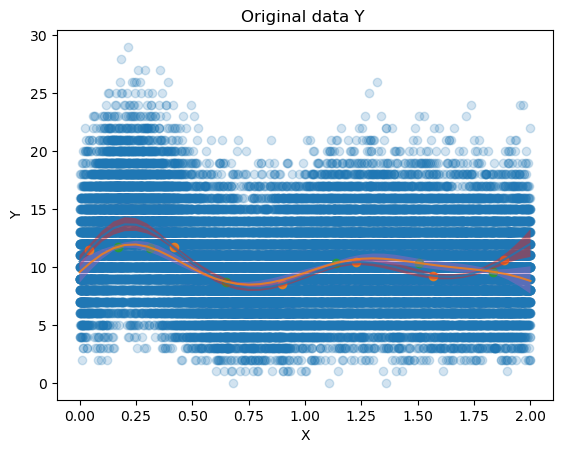

PyObject Text(0.5, 1.0, 'Original data Y ')

In [13]:
PyPlot.scatter(X, Y, alpha=0.2)
PyPlot.scatter(temp_model.params.inducing_locs, exp.(temp_model.params.inducing_mean), alpha=0.8)
PyPlot.scatter(test_inf.params[1].inducing_locs, exp.(test_inf.params[1].inducing_mean), alpha=0.8)
PyPlot.plot(pX, exp.(predY), alpha=0.8)
PyPlot.fill_between(pX[:,1], exp.(predY + 2. .* sqrt.(predSD.^2 .+ err_sigma^2)), exp.(predY - 2. .* sqrt.(predSD.^2 .+ err_sigma^2)),alpha=.5)
PyPlot.plot(pX, exp.(predY_inf), alpha=0.8)
PyPlot.fill_between(pX[:,1], exp.(predY_inf + 2. .* sqrt.(predSD_inf.^2 .+ err_sigma^2)), exp.(predY_inf - 2. .* sqrt.(predSD_inf.^2 .+ err_sigma^2)),alpha=.5)
PyPlot.xlabel("X")
PyPlot.ylabel("Y")
PyPlot.title("Original data Y ")


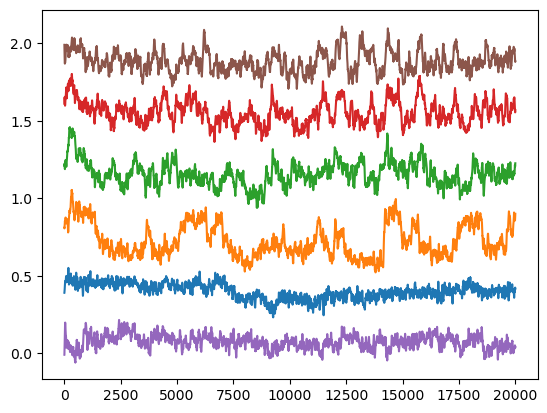

6-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fca48b82dc0>
 PyObject <matplotlib.lines.Line2D object at 0x7fca48b82eb0>
 PyObject <matplotlib.lines.Line2D object at 0x7fca48b82f70>
 PyObject <matplotlib.lines.Line2D object at 0x7fca48b8e070>
 PyObject <matplotlib.lines.Line2D object at 0x7fca48b8e130>
 PyObject <matplotlib.lines.Line2D object at 0x7fca48b8e1f0>

In [14]:
PyPlot.plot(p_traces["inducing_locs"][:,:,1])


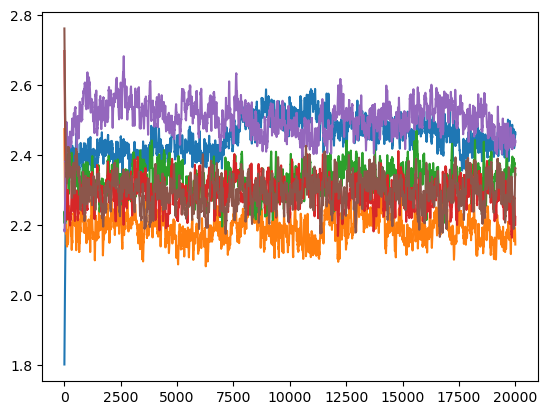

6-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fca44758280>
 PyObject <matplotlib.lines.Line2D object at 0x7fca44758370>
 PyObject <matplotlib.lines.Line2D object at 0x7fca44758430>
 PyObject <matplotlib.lines.Line2D object at 0x7fca447584f0>
 PyObject <matplotlib.lines.Line2D object at 0x7fca447585b0>
 PyObject <matplotlib.lines.Line2D object at 0x7fca44758670>

In [15]:
PyPlot.plot(p_traces["inducing_mean"])


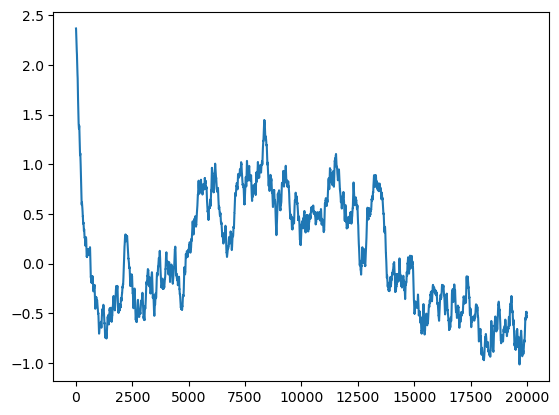

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fca44b9dca0>

In [16]:
PyPlot.plot(p_traces["const_mean"])


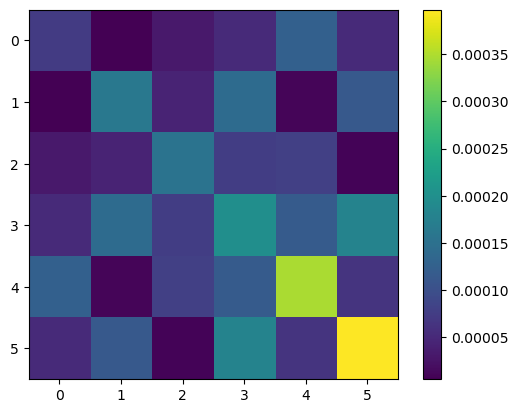

PyObject <matplotlib.colorbar.Colorbar object at 0x7fca45528130>

In [17]:
PyPlot.imshow(abs.(temp_model.params.inducing_L * temp_model.params.inducing_L'))
PyPlot.colorbar()

In [27]:
n = 50000
X = 4 .* rand(2*n) .- 1.
X = reshape(X,(n,2))

lam = (5. * sin.(1. * X[:,2]) .* sin.(2. * X[:,1]) .* exp.( -abs.(X[:,1] .- 1))) .^ 2;
Y   = [rand(Poisson(l),1)[1] for l in lam];

ni = 30


30

In [28]:
temp_model_2D = HSVGP.SVGP_obj(X, float(Y), ni, "poisson");

In [29]:
# Package currently defaults to initialize based on nearest neighbor data
#     for poisson we want GP on log-lambda, so should initialize
#     the inducing points taking log of data (and adjusting for zeros)
temp_model_2D.params.inducing_mean = log.(temp_model_2D.params.inducing_mean .+ 1.0);

In [30]:
@time opt_trace2D, p_traces = HSVGP.fit_svgp!(temp_model_2D, n_iters=2000, batch_size=100, return_param_traces = true);

 12.520782 seconds (118.32 M allocations: 10.734 GiB, 11.14% gc time)


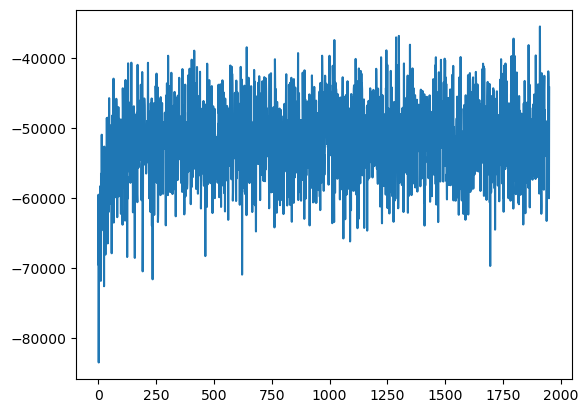

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x181495610>

In [31]:
PyPlot.plot(opt_trace2D[50:end])

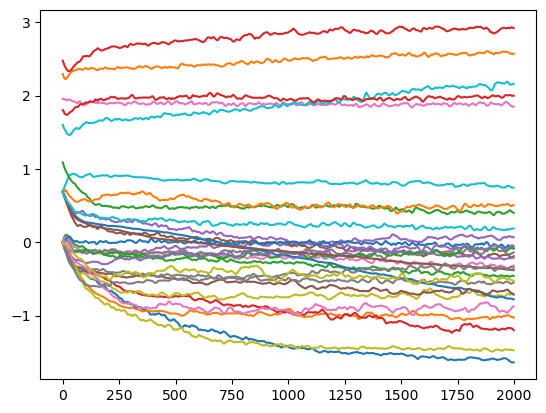

30-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x18161f2e0>
 PyObject <matplotlib.lines.Line2D object at 0x18161f3d0>
 PyObject <matplotlib.lines.Line2D object at 0x18161f490>
 PyObject <matplotlib.lines.Line2D object at 0x18161f550>
 PyObject <matplotlib.lines.Line2D object at 0x18161f610>
 PyObject <matplotlib.lines.Line2D object at 0x18161f6d0>
 PyObject <matplotlib.lines.Line2D object at 0x18161f790>
 PyObject <matplotlib.lines.Line2D object at 0x18161f850>
 PyObject <matplotlib.lines.Line2D object at 0x18161f910>
 PyObject <matplotlib.lines.Line2D object at 0x18161f9d0>
 PyObject <matplotlib.lines.Line2D object at 0x1815f7520>
 PyObject <matplotlib.lines.Line2D object at 0x18161fb20>
 PyObject <matplotlib.lines.Line2D object at 0x18161fbe0>
 ⋮
 PyObject <matplotlib.lines.Line2D object at 0x181c5a0a0>
 PyObject <matplotlib.lines.Line2D object at 0x181c5a160>
 PyObject <matplotlib.lines.Line2D object at 0x181c5a220>
 PyObject <matplotlib.lines.Line

In [32]:
PyPlot.plot(p_traces["inducing_mean"])


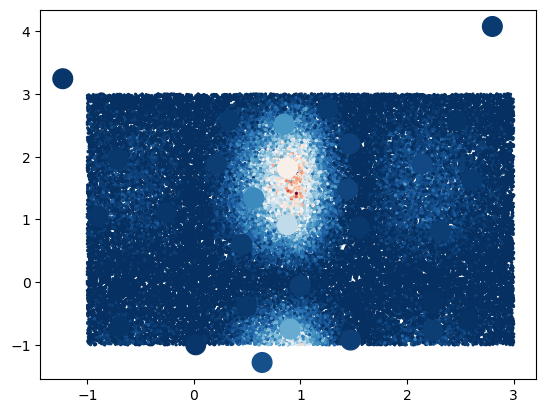

PyObject <matplotlib.collections.PathCollection object at 0x181495820>

In [33]:
vmin = minimum(Y)
vmax = maximum(Y)

scatter(X[:,1],X[:,2],s=2,c=Y[:,1],vmin=vmin,vmax=vmax,cmap=ColorMap("RdBu_r"))
scatter(temp_model_2D.params.inducing_locs[:,1],temp_model_2D.params.inducing_locs[:,2], 
    c = exp.(temp_model_2D.params.inducing_mean), 
    s=200,vmin=vmin,vmax=vmax,cmap=ColorMap("RdBu_r"))

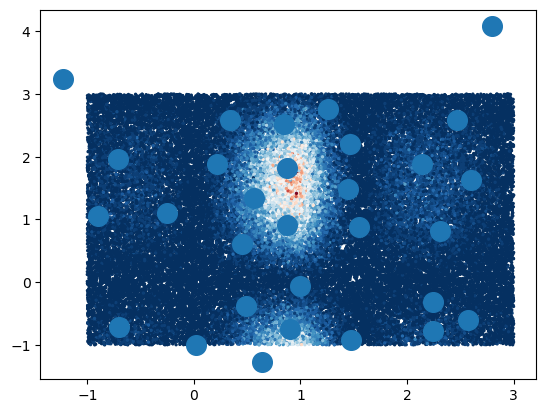

PyObject <matplotlib.collections.PathCollection object at 0x1815eeb50>

In [34]:
scatter(X[:,1],X[:,2],s=2,c=Y[:,1],vmin=vmin,vmax=vmax,cmap=ColorMap("RdBu_r"))
scatter(temp_model_2D.params.inducing_locs[:,1],temp_model_2D.params.inducing_locs[:,2], s=200,vmin=-1.5,vmax=1.5,cmap=ColorMap("RdBu_r"))

In [35]:
px = hcat([[x,y] for x in collect(-1:0.05:3) for y in collect(-1:0.05:3)]...)'
pn = size(px)[1]

6561

In [36]:
p_mean, p_sd = HSVGP.pred_vgp(px, temp_model_2D.params);

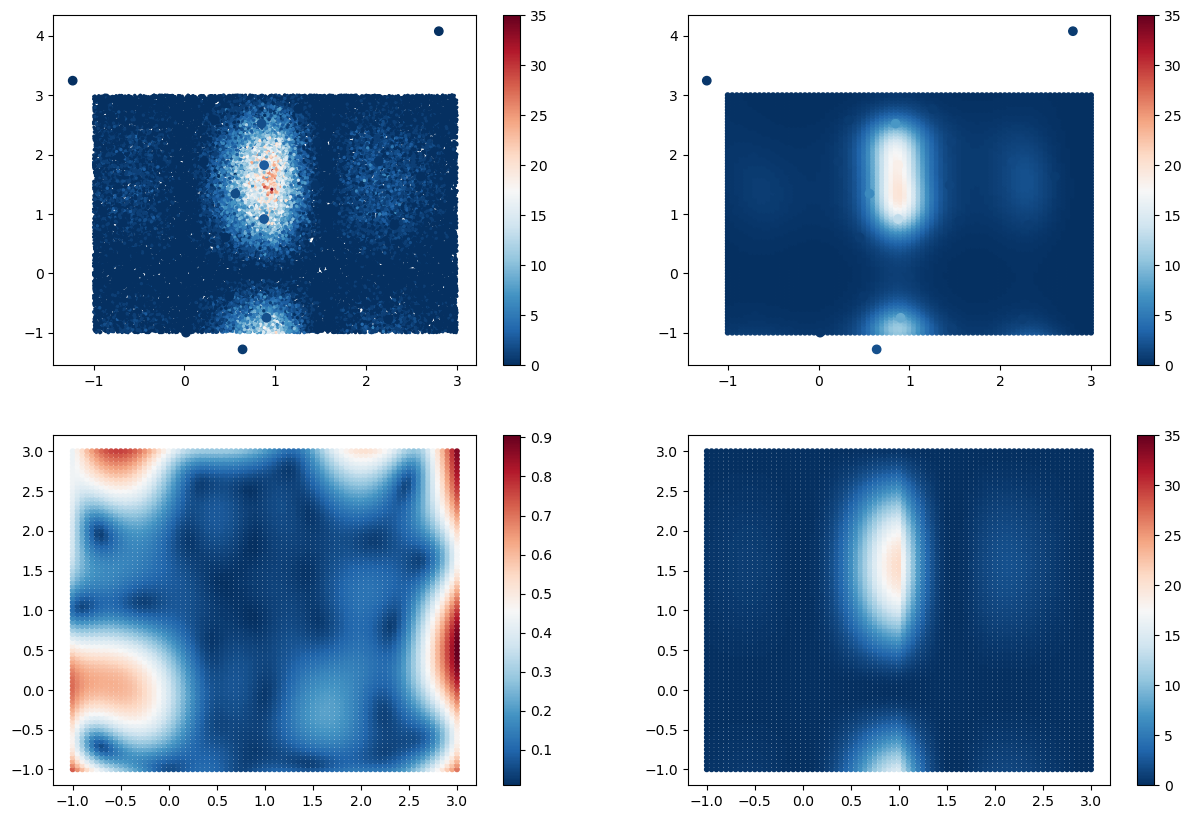

PyObject <matplotlib.colorbar.Colorbar object at 0x17e38e580>

In [37]:
fig = figure(figsize=(15,10))
subplot(221)
PyPlot.scatter(X[:,1],X[:,2],s=2,c=Y[:,1],vmin=vmin,vmax=vmax,cmap=ColorMap("RdBu_r"))
PyPlot.scatter(temp_model_2D.params.inducing_locs[:,1],
    temp_model_2D.params.inducing_locs[:,2], 
    c=temp_model_2D.params.inducing_mean,
    cmap=ColorMap("RdBu_r"),vmin=vmin,vmax=vmax)
PyPlot.colorbar()
subplot(222)
PyPlot.scatter(px[:,1],px[:,2],s=10,c=exp.(p_mean),vmin=vmin,vmax=vmax,cmap=ColorMap("RdBu_r"))
scatter(temp_model_2D.params.inducing_locs[:,1],
    temp_model_2D.params.inducing_locs[:,2], 
    c=exp.(temp_model_2D.params.inducing_mean),
    cmap=ColorMap("RdBu_r"),vmin=vmin,vmax=vmax)
PyPlot.colorbar()
subplot(223)
PyPlot.scatter(px[:,1],px[:,2],s=10,c=p_sd,cmap=ColorMap("RdBu_r"))
PyPlot.colorbar()
subplot(224)
PyPlot.scatter(px[:,1],px[:,2],s=10,
    c=(5. * sin.(1. * px[:,2]) .* sin.(2. * px[:,1]) .* exp.( -abs.(px[:,1] .- 1))) .^ 2,
    vmin=vmin,vmax=vmax,cmap=ColorMap("RdBu_r"))
PyPlot.colorbar()


In [61]:
struct tstr
    n::Int64              # Number of observations
    p::Int64              # Number of input dimensions
end


In [85]:
function tstr(n::Int64)
    b = n^2
    tstr(n, b)
end

tstr

In [87]:
aa = tstr(2)

tstr(2, 4)